   # FEATURIZATION AND MODEL TUNING PROJECT

******************************************************************************

**Data Description**

The actual concrete compressive strength(MPa) for a given mixture under a specific age (days) was determined from laboaratory. Data is in raw form(not scaled). The data has 8 quantitative input variables, and 1 quantitaive output variable and 1030 instances (observations)

**Domain**

Cement Manufacturing

**Context**

Concrete is the most important in civil enginerring, The concrete compressive strength is a highly non linear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggreagate.

**Attribute** **Information**

* Cement           : measured in kg in a m3 mixture
* Blast            : measured in kg in a m3 mixture
* Fly ash          : measured in kg in a m3 mixture
* Water            : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Agrregate   : measured in kg in a m3 mixture
* Age              : day (1~365)
* Concrete compressive strength measured in Mpa

**Objective**

Modeling of strength of high performance concrete using Machine Learning

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

**importing the libraries**

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , FunctionTransformer , OneHotEncoder, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

**importing the data**

In [3]:
cement = pd.read_csv(r"C:\Users\emran\Downloads\concrete.csv")

In [4]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


**Summary of data**

In [5]:
cement.shape

(1030, 9)

In [6]:
cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Univariate Analysis

In [7]:
cement.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


*Conclusions that can be made out of it:*

* all the features given in the data are numeric
* There are no NULL or NaN values present in the data
* In total there are 8 features and 1030 observations
* We shall be using strength as the dependent variable and all other features as independent variable as it makes the best sense out of the problem objective.
* Age value ranges from 1 to 365

In [9]:
fig = px.box(cement, x="cement")
fig.show()

In [10]:
fig = px.box(cement, x="slag")
fig.show()

In [11]:
fig = px.box(cement, x="ash")
fig.show()

In [12]:
fig = px.box(cement, x="water")
fig.show()

In [13]:
fig = px.box(cement, x="superplastic")
fig.show()

In [14]:
fig = px.box(cement, x="coarseagg")
fig.show()

In [15]:
fig = px.box(cement, x="fineagg")
fig.show()

In [16]:
fig = px.box(cement, x="age")
fig.show()

In [17]:
fig = px.box(cement, x="strength")
fig.show()

* from the plotly we can plotted and individual attribute's boxplots which were plotted before are the evidences that there are outliers present in the attributes: slag, ash, superplastic, fineagg, age

# Multivariate Analysis

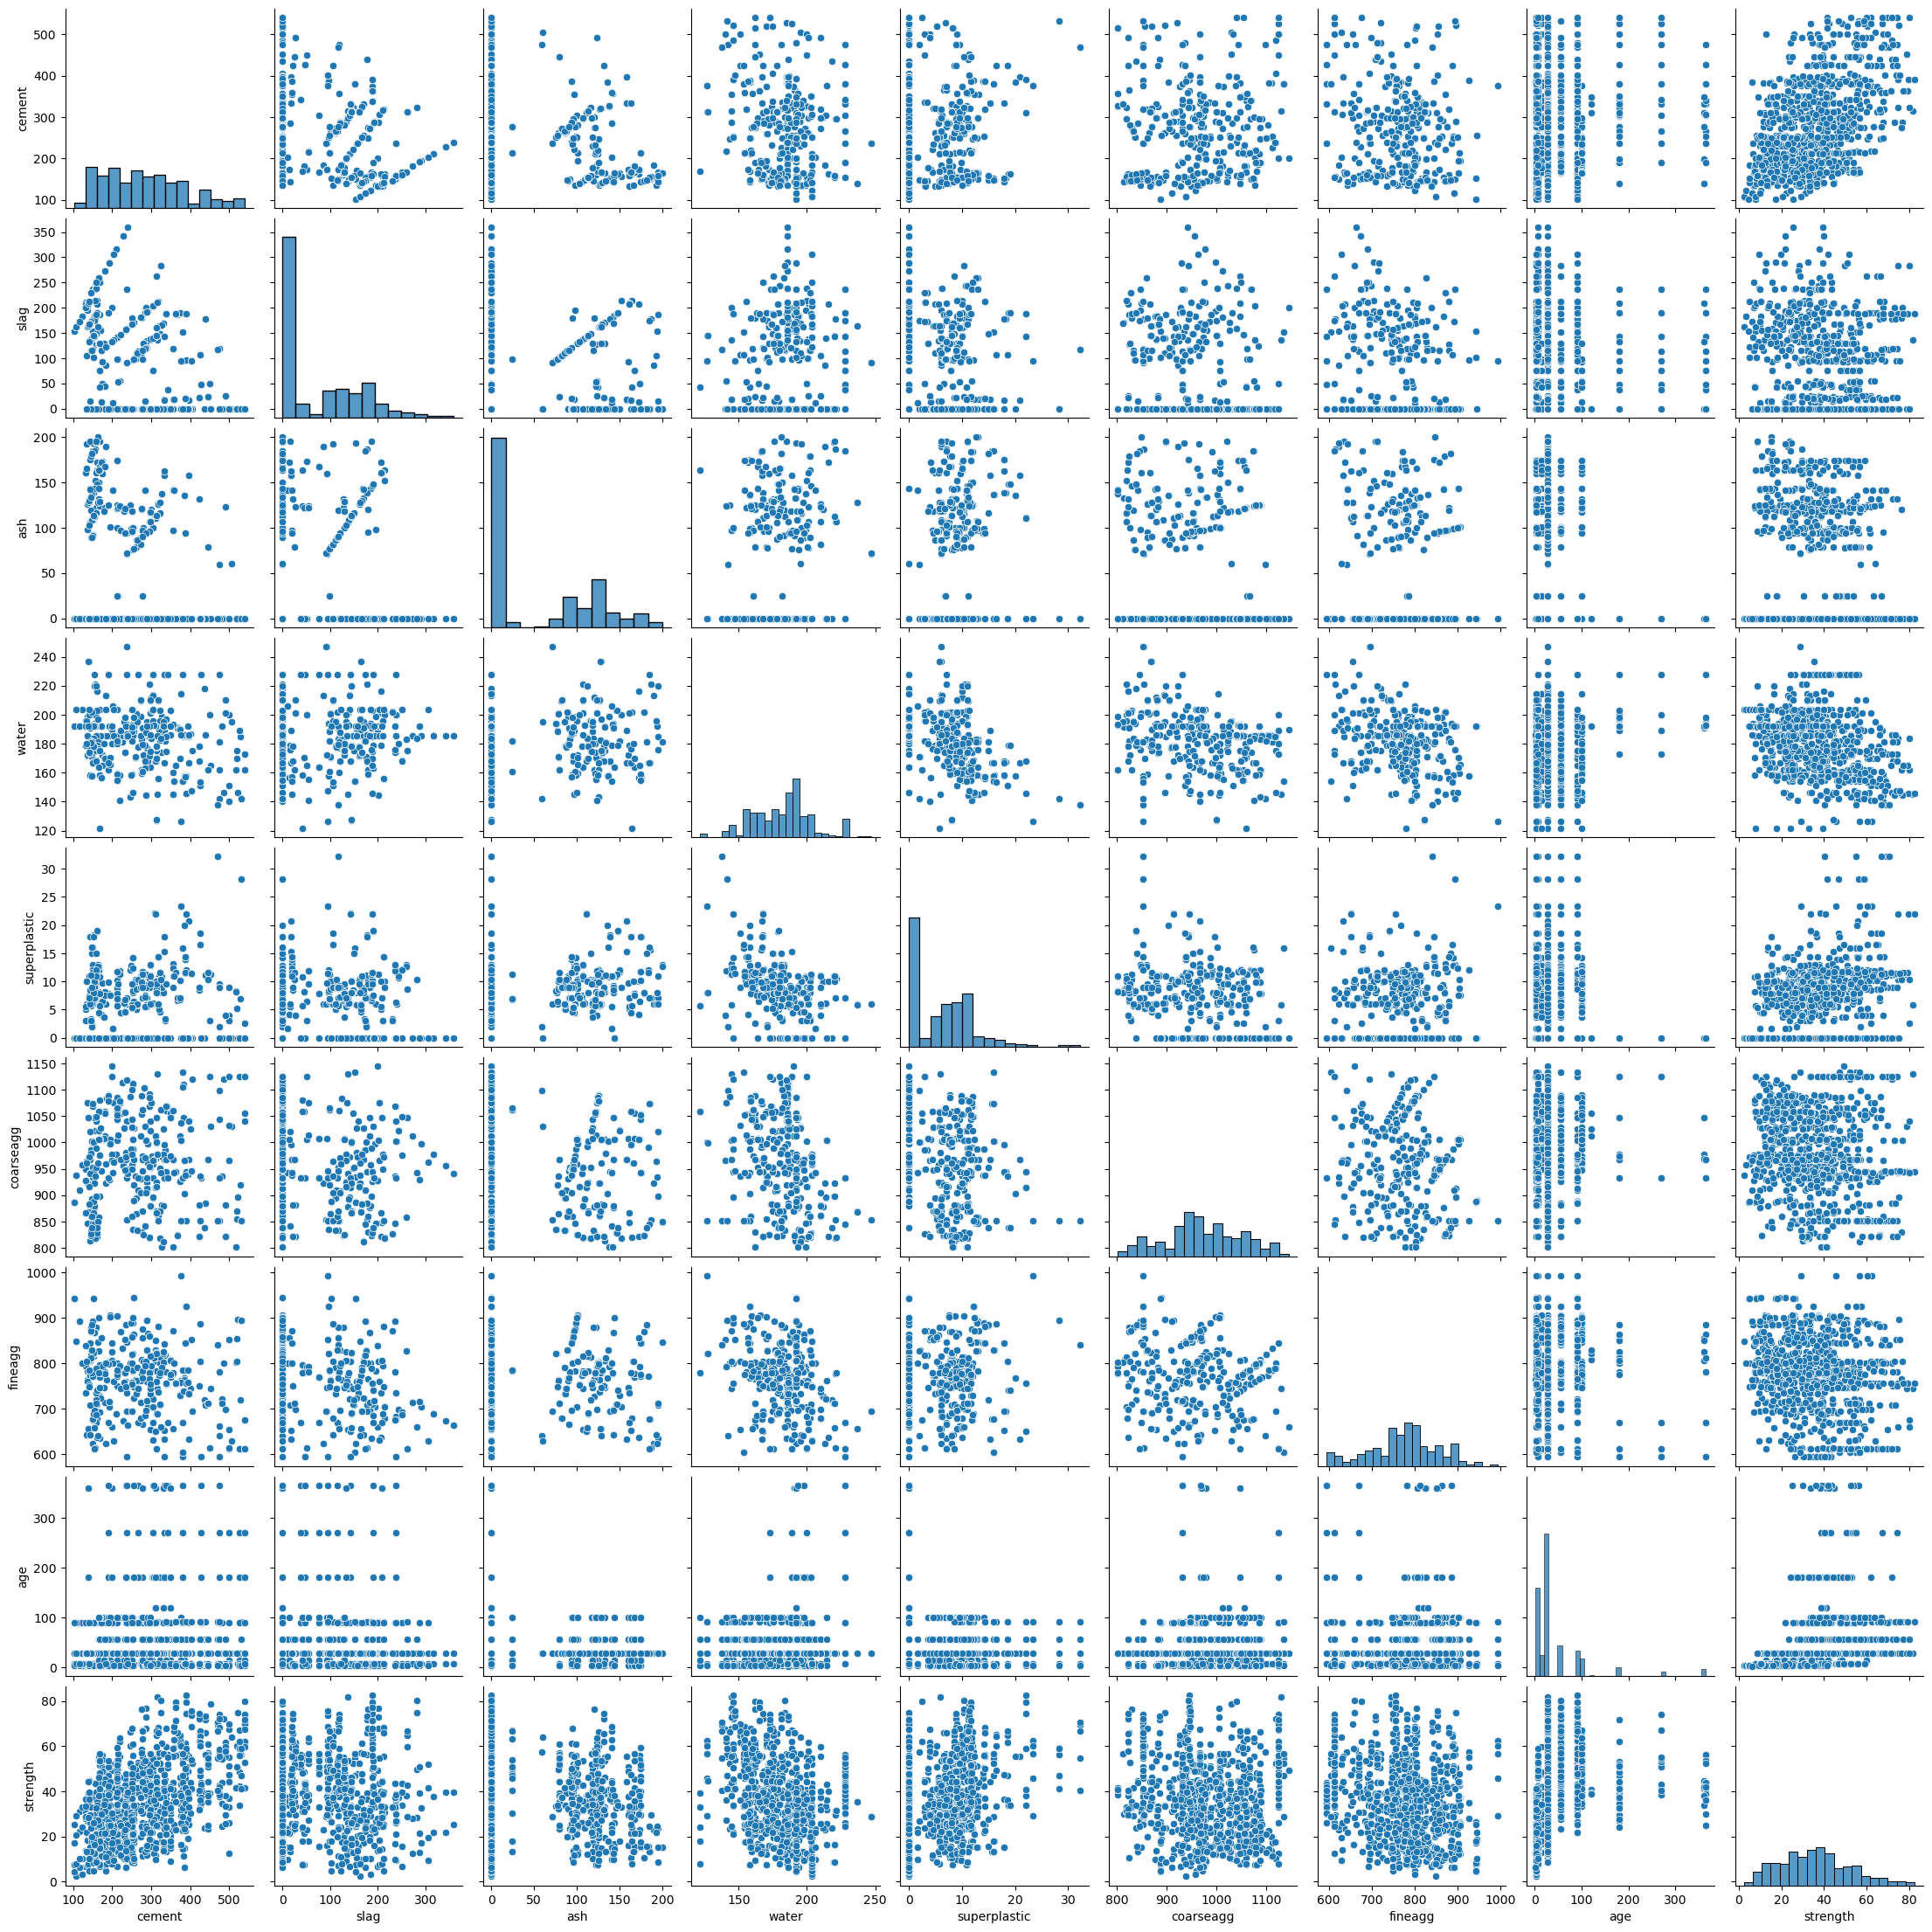

In [18]:
sns.pairplot(cement)
plt.show()

*Conclusion that can be drawn from bi-variate analysis:*

* cement and strength are the 2 attributes which looks more normal than other attributes
* slag, ash, superplastic, age are the attributes which are rightly skewed.
* Except cement and strength all other attributes have multiple/ more than one Gaussians.

# Split the data

In [19]:
from sklearn.model_selection import train_test_split

cement["cement_cat"]=pd.cut(cement['cement'], bins=[100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf], 
                              labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,4
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2


In [20]:
strat_train_set, strat_test_set = train_test_split(cement, test_size=0.3, stratify=cement["cement_cat"], random_state=42)

In [21]:
strat_train_set.drop("cement_cat", axis=1, inplace=True)
strat_test_set.drop("cement_cat", axis=1, inplace=True)

In [22]:
strat_train_set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
892,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
495,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,3,13.54
841,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,3,28.80
877,265.0,111.0,86.0,195.0,6.0,833.0,790.0,28,41.54
38,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54
...,...,...,...,...,...,...,...,...,...
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
211,424.0,22.0,132.0,178.0,8.5,822.0,750.0,7,39.00
325,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,100,40.39
546,150.0,236.8,0.0,173.8,11.9,1069.3,674.8,28,37.43


In [23]:
strat_test_set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
409,183.9,122.6,0.0,203.5,0.0,959.2,800.0,28,24.05
713,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,53.69
202,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,7,25.45
267,145.9,230.5,0.0,202.5,3.4,827.0,871.8,28,32.72
887,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,56,51.43
...,...,...,...,...,...,...,...,...,...
408,305.3,203.5,0.0,203.5,0.0,965.4,631.0,90,54.60
285,203.5,305.3,0.0,203.5,0.0,963.4,630.0,90,51.86
977,298.0,0.0,107.0,210.0,11.0,880.0,744.0,28,31.87
294,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,28,26.91


*Conclusion that can be drawn from split data:*

* cement attribute is more useful or important attribute to predict the strength of concrete.
* training data shold be representative of data.
* so we used stratified sampling and also split the data into 70% for training data and 30% for testing data.

# Relationship between dependent and independent variables

In [24]:
cement = strat_train_set.copy()

In [25]:
cement.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.279444,-0.391976,-0.087796,0.109108,-0.115800,-0.215139,0.104268,0.523844
slag,-0.279444,1.000000,-0.320203,0.101831,0.047414,-0.293591,-0.259619,-0.043445,0.119964
ash,-0.391976,-0.320203,1.000000,-0.255619,0.373654,-0.016576,0.073316,-0.146408,-0.106504
water,-0.087796,0.101831,-0.255619,1.000000,-0.655169,-0.158909,-0.466366,0.286071,-0.289897
superplastic,0.109108,0.047414,0.373654,-0.655169,1.000000,-0.298251,0.239266,-0.191191,0.372421
coarseagg,-0.115800,-0.293591,-0.016576,-0.158909,-0.298251,1.000000,-0.183409,-0.004659,-0.190844
fineagg,-0.215139,-0.259619,0.073316,-0.466366,0.239266,-0.183409,1.000000,-0.182495,-0.146078
age,0.104268,-0.043445,-0.146408,0.286071,-0.191191,-0.004659,-0.182495,1.000000,0.326640
strength,0.523844,0.119964,-0.106504,-0.289897,0.372421,-0.190844,-0.146078,0.326640,1.000000


Text(0.5, 1.0, 'Correlation between the variables')

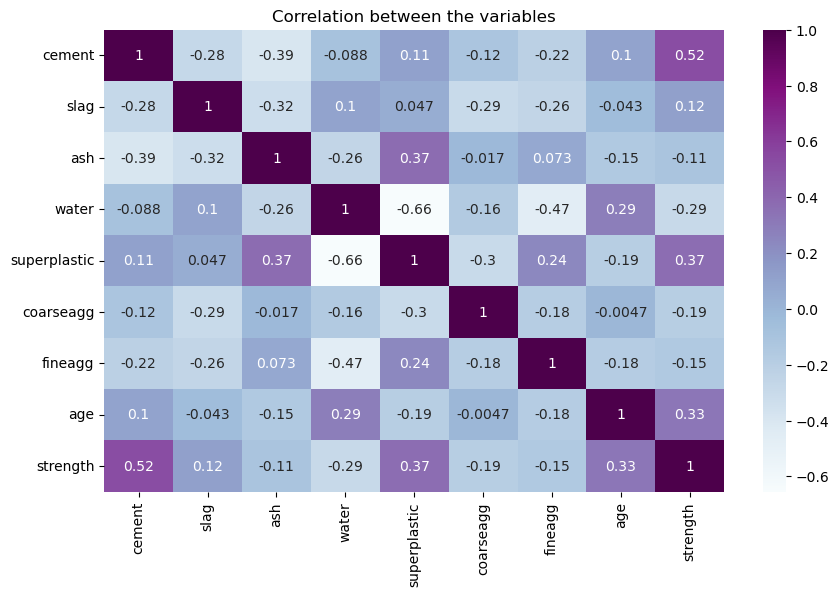

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(cement.corr(), annot= True, cmap='BuPu', linecolor='black')
plt.title("Correlation between the variables")

*Conclusion that can be drawn from relationship between dependent and independent variables:*

* Strength vs Cement: is highly positively correlated, it's also linearly related
* Strength vs Slag: is positively correalted with less degree of correaltion
* Strength vs Ash: is negatively correlated of almost -0.11
* Strength vs Water:- Negatively correalted and poorly realted to dependent variable
* Strength vs Superplastic: positive and fairly correalted of almost 0.37
* Strength vs coarseagg/fineagg : negatively correalted
* Strength vs age: positively and fairly correalted

*--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

**Make each attributes into Gausian distributions**

In [27]:
sy = PowerTransformer("yeo-johnson")
df1 = sy.fit_transform(cement)

In [28]:
sy.lambdas_

array([ 1.77080344e-01,  2.79588659e-02, -1.60800401e-01,  8.45454614e-01,
        2.71043452e-01,  1.33325982e+00,  1.97617305e+00,  1.54412265e-04,
        5.52493692e-01])

**Check how much outliers is in the training set**

In [29]:
df1 = cement[(cement["slag"]>350) | (cement["water"]>228) | (cement["superplastic"]>23.4) | 
       ((cement["fineagg"]>945.0)) | (cement["age"]>120)]

In [30]:
df1.shape

(54, 9)

* There total 54 outliers in the training set.
* But we don't remove this outliers because it is right information and also it will use full for predictions.

*------------------------------------------------------------------------------------------------------------------------------------------------------------*

# Creating pipeline for data preprocessing

In [31]:
cement = strat_train_set.drop("strength", axis=1)
cement_labels = strat_train_set["strength"].copy()

In [32]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), PowerTransformer("yeo-johnson"), StandardScaler())
preprocessing = ColumnTransformer([("num", num_pipeline, ['cement', 'slag', 'ash', 'water', 'superplastic', 
                                                          'coarseagg', 'fineagg', 'age']),])

In [33]:
cement_prepared = preprocessing.fit_transform(cement)
cement_prepared.shape

(721, 8)

In [34]:
preprocessing.get_feature_names_out()

array(['num__cement', 'num__slag', 'num__ash', 'num__water',
       'num__superplastic', 'num__coarseagg', 'num__fineagg', 'num__age'],
      dtype=object)

*In this pipeline we used imputation if there is filling value, converting attributes into gauisan distribution and scaling variables.*

*-----------------------------------------------------------------------------------------------------------------------------------------------------------------------*

# Select and train model

**Algorithm**:- *Linear Regression*

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(cement, cement_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'slag', 'ash',
                                                   'water', 'superplastic',
                                                   'coarseagg', 'fineagg',
                                                   'age'])])),
                ('linearregression', LinearRegression())])

In [36]:
lin_predictions = lin_reg.predict(cement)
lin_predictions[:5].round(2)

array([62.17, 13.1 , 33.57, 40.66, 20.12])

In [37]:
cement_labels.iloc[:5]

892    77.30
495    13.54
841    28.80
877    41.54
38     17.54
Name: strength, dtype: float64

In [38]:
lin_rmse = mean_squared_error(cement_labels, lin_predictions, squared=False)
print("RMSE: ", lin_rmse)

RMSE:  7.395641721487372


In [39]:
from sklearn import metrics
lin_reg_r2 = metrics.r2_score(cement_labels, lin_predictions)
print("R^2 Score:", lin_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(cement_labels, lin_predictions))

R^2 Score: 0.8105926237174641
Mean Squared Error: 54.6955164726047


**Algorithm**:- *Decision Tree Regressor*

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(cement, cement_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'slag', 'ash',
                                                   'water', 'superplastic',
                                                   'coarseagg', 'fineagg',
                                                   'age'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [41]:
tree_predictions = tree_reg.predict(cement)
tree_predictions[:5].round(2)

array([77.3 , 13.54, 28.8 , 41.54, 17.54])

In [42]:
tree_rmse = mean_squared_error(cement_labels, tree_predictions, squared=False)
print("RMSE: ", tree_rmse)

RMSE:  1.0244406477569594


*RMSE is 1.03 but training data overfit the model so we used validation set i.e cross validation method for evaluating the model.*

In [43]:
tree_rmses = -cross_val_score(tree_reg, cement, cement_labels, cv=10, scoring="neg_root_mean_squared_error")

In [44]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      7.569530
std       0.914924
min       5.706533
25%       7.517919
50%       7.847544
75%       8.050771
max       8.732641
dtype: float64

In [45]:
tree_reg_r2 = metrics.r2_score(cement_labels, tree_predictions)
print("R^2 Score:", tree_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(cement_labels, tree_predictions))

R^2 Score: 0.9963657168149488
Mean Squared Error: 1.0494786407766987


**Algorithm**:- *Random Forest Regressor*

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(cement, cement_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'slag', 'ash',
                                                   'water', 'superplastic',
                                                   'coarseagg', 'fineagg',
                                                   'age'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [47]:
forest_predictions = forest_reg.predict(cement)
forest_predictions[:5].round(2)

array([77.21, 13.46, 26.83, 40.72, 16.95])

In [48]:
forest_rmse = mean_squared_error(cement_labels, forest_predictions, squared=False)
print("RMSE: ", forest_rmse)

RMSE:  2.112485298712965


In [49]:
forest_rmses = -cross_val_score(forest_reg, cement, cement_labels, cv=10, scoring="neg_root_mean_squared_error")
pd.Series(forest_rmses).describe()

count    10.000000
mean      5.385126
std       0.837138
min       4.203105
25%       4.772806
50%       5.494135
75%       5.687302
max       7.148637
dtype: float64

In [50]:
forest_reg_r2 = metrics.r2_score(cement_labels, forest_predictions)
print("R^2 Score:", forest_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(cement_labels, forest_predictions))

R^2 Score: 0.9845462973664562
Mean Squared Error: 4.462594137278406


In [51]:
lin_rmses = -cross_val_score(lin_reg, cement, cement_labels, cv=10, scoring="neg_root_mean_squared_error")
pd.Series(lin_rmses).describe()

count    10.000000
mean      7.474118
std       0.684997
min       6.388662
25%       7.074935
50%       7.377866
75%       8.018737
max       8.488838
dtype: float64

**Algorithm**:- *Support Vector Regressor*

In [52]:
from sklearn.svm import SVR

svr_reg = make_pipeline(preprocessing, SVR())
svr_reg.fit(cement, cement_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'slag', 'ash',
                                                   'water', 'superplastic',
                                                   'coarseagg', 'fineagg',
                                                   'age'])])),
                ('svr', SVR())])

In [53]:
svr_predictions = svr_reg.predict(cement)
svr_predictions[:5].round(2)

array([63.58, 19.4 , 31.01, 39.12, 18.12])

In [54]:
svr_rmses = -cross_val_score(svr_reg, cement, cement_labels, cv=10, scoring="neg_root_mean_squared_error")
pd.Series(svr_rmses).describe()

count    10.000000
mean      8.050684
std       0.775788
min       6.862777
25%       7.606346
50%       7.906980
75%       8.396856
max       9.491036
dtype: float64

Conclusion that can be drawn from model selection:*

* Random Forest Regressor is the best model for this because mean of rmses is very low compare to other.
* So we will hyperparameter tune to random forest regressor.

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

**Hyper Parameter Tuning of Random Forest Regressor**

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([("preprocessing", preprocessing), ("random_forest", RandomForestRegressor(random_state=42))])
param_distribs = {'random_forest__max_features': randint(low=2, high=9), 
                 'random_forest__n_estimators': randint(low=0, high=300),
                 'random_forest__bootstrap':[True, False],
                 'random_forest__max_depth': randint(low=0, high=300),
                 'random_forest__criterion': ['squared_error', 'absolute_error']}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, 
                               scoring="neg_root_mean_squared_error")
rnd_search.fit(cement, cement_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('powertransformer',
                                                                                                PowerTransformer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['cement',
                                                                                'slag',
                                                                                'ash',
                                                                                'water',
                                                                                'superplastic',
                                                                                'coarseagg',
                                                                                'fineagg',
                                                                                'age'])])),
                                             ('random_forest',
                                              Ran...
                                        'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8753E2EF0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8753E3400>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8753E0610>},
                   scoring='neg_root_mean_squared_error')

In [56]:
-rnd_search.best_score_

5.689622009270372

In [57]:
rnd_search.best_params_

{'random_forest__bootstrap': True,
 'random_forest__criterion': 'absolute_error',
 'random_forest__max_depth': 121,
 'random_forest__max_features': 6,
 'random_forest__n_estimators': 156}

*We used randomizedsearchcv because it help to find the best parameters for fixed range.*

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

**Final model**

In [58]:
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'slag', 'ash',
                                                   'water', 'superplastic',
                                                   'coarseagg', 'fineagg',
                                                   'age'])])),
                ('random_forest',
                 RandomForestRegressor(criterion='absolute_error',
                                       max_depth=121, max_features=6,
                                       n_estimators=156, random_state=42))])

In [59]:
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.26, 0.1 , 0.04, 0.12, 0.08, 0.07, 0.07, 0.27])

In [60]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.2666771162502848, 'num__age'),
 (0.2561417803589399, 'num__cement'),
 (0.11600297646429987, 'num__water'),
 (0.09533617535916089, 'num__slag'),
 (0.08318601411339659, 'num__superplastic'),
 (0.07285968545936389, 'num__fineagg'),
 (0.07221650535500258, 'num__coarseagg'),
 (0.037579746639551555, 'num__ash')]

# Evaluate in test set

In [61]:
X_test = strat_test_set.drop("strength", axis=1)
y_test = strat_test_set["strength"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("RMSE:", final_rmse)

RMSE: 5.079240378613091


In [62]:
final_model_r2 = metrics.r2_score(y_test, final_predictions)
print("R^2 Score:", final_model_r2)

R^2 Score: 0.8990373360106798


In [63]:
print(f"Accuracy of Hyperparameter tuned Random Forest Regressor is {100*final_model_r2}.")

Accuracy of Hyperparameter tuned Random Forest Regressor is 89.90373360106798.


*We can conclude that RMSE is low for test data so it show that it is generalized and R squared is 0.90 so we can say that 90% is the accuracy of our hyperparameter tune Random Forest Regressor model.*